<a href="https://colab.research.google.com/github/skerryvore/multispectral_image_analysis/blob/main/notebooks/cuprite_kmeans_example01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install rasterio


In [40]:
import rasterio as rio
from rasterio.plot import show
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mc

In [41]:
#Open image file using raster.rio.open()

cuprite = rio.open('https://github.com/skerryvore/multispectral_image_analysis/blob/main/images/cuprite_b14_vis_swir_tir_wgs84_utm_z11.tif?raw=true')

print (cuprite.meta)



{'driver': 'GTiff', 'dtype': 'int16', 'nodata': 0.0, 'width': 799, 'height': 736, 'count': 14, 'crs': CRS.from_epsg(32611), 'transform': Affine(14.948963579474349, 0.0, 482247.0989,
       0.0, -14.948963722825916, 4158556.1804)}


28.0 102.0


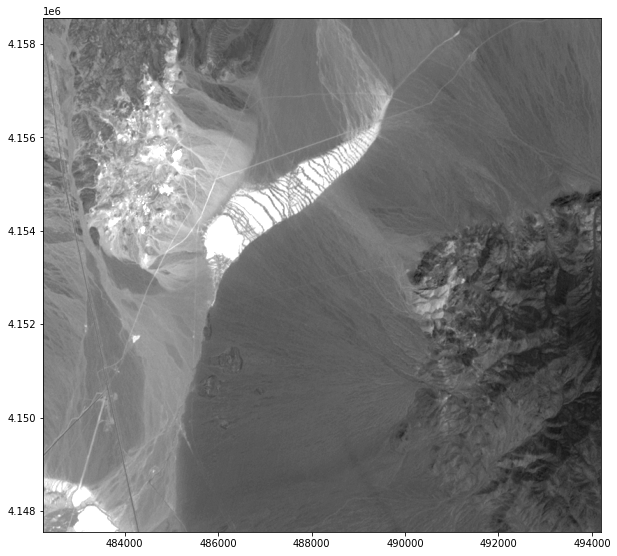

In [42]:
# Read and enhance and show the raw image

cuprite_img = cuprite.read() # read the opened raw image data
vmin, vmax = np.nanpercentile(cuprite_img,(0,50)) #set min-max percentile contrast stretch
print(vmin,vmax)

# show enhanced image

plt.figure(figsize=[10,10])
show(cuprite, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()



In [43]:
# create an empty numpy array to hold the image data

cuprite_xyb = np.empty((cuprite.height,cuprite.width, cuprite.count), cuprite.meta['dtype'])

# loop over raster bands and read in the data to fill the empty array

for band in range(cuprite_xyb.shape[2]):
  cuprite_xyb[:,:,band] = cuprite.read(band+1)

print(cuprite_xyb.shape)

(736, 799, 14)


In [44]:
# convert 3D array into 2D array, i.e. flatten each band into a 1D array

cuprite_data = cuprite_xyb[:,:,:14].reshape((cuprite_xyb.shape[0]*cuprite_xyb.shape[1],cuprite_xyb.shape[2]))

print(cuprite_data.shape)

(588064, 14)


In [62]:
# setup and train the classifier

cl = cluster.KMeans(n_clusters=12) #create an object classifier and set number of clusters
param = cl.fit(cuprite_data) # train the classifier

cuprite_cl = cl.labels_ # get the labels of the classes
cuprite_cl = cuprite_cl.reshape(cuprite_xyb[:,:,0].shape) # reshape array so we can plot the image, as single band array

print(cuprite_cl.shape)


(736, 799)


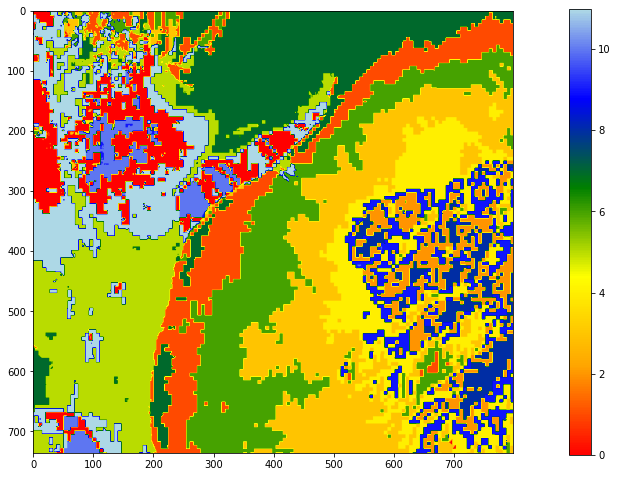

In [63]:
# Plot the classified image using specified colour map

cmap = mc.LinearSegmentedColormap.from_list("",["red","orange","yellow","green","blue","lightblue"])

# show classified image

plt.figure(figsize=[10,10])
plt.imshow(cuprite_cl,cmap=cmap)
#plt.colorbar()
plt.colorbar(fraction=0.04, pad=0.1)
#plt.axis('off')
plt.show()